## Parameters and Imports

In [1]:
runs_folder = 'Example_Lin1'
lr = 1e-5
solvent_vectorizer = 'solvent_macro_props1'
solute_vectorizer = 'solute_TESA'
norm_bools = (True, True, True)
epochs = 20

comments = f"""solute: {solvent_vectorizer}
                solute: {solute_vectorizer}
                norm: {norm_bools}
                learning rate: {lr}
                epochs: {epochs}
            """

In [2]:
from torch.utils.data import DataLoader
from my_nets.Create_dataset import *
from Vectorizers.vectorizers import *
from my_nets.LinearNet import *
from my_nets.net_func import *
import pickle

## Create dataset

In [3]:
table_v1 = pd.read_table(project_path('Tables/SS_table_v3.tsv'))
dataset = SS_Dataset(table_v1, solvent_vectorizer, solute_vectorizer, normalize=norm_bools)
len_data = dataset.__len__()
val_data = len_data // 10
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_data - val_data, val_data])

solvent_table = pd.read_table(project_path('Tables/solvent_test_table_v3.tsv'))
solute_table = pd.read_table(project_path('Tables/solute_test_table_v3.tsv'))
solvent_test_dataset = SS_Dataset(solvent_table, solvent_vectorizer, solute_vectorizer,
                                  normalize=norm_bools, show_norm_params=False)
solute_test_dataset = SS_Dataset(solute_table, solvent_vectorizer, solute_vectorizer,
                                 normalize=norm_bools, show_norm_params=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

solvent_test_loader = DataLoader(solvent_test_dataset, batch_size=46, shuffle=False)
solute_test_loader = DataLoader(solute_test_dataset, batch_size=64, shuffle=False)

print(f'train length: {len(train_loader.dataset)}')
print(f'val length: {len(val_loader.dataset)}')
print(f'solute test length: {len(solute_test_loader.dataset)}')
print(f'solvent test length: {len(solvent_test_loader.dataset)}')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/balepka/PycharmProjects/Tables/SS_table_v3.tsv'

In [4]:
# print(dataset.norm_params)
for folder in ('Runs/', 'Run_results/'):
    try:
        os.makedirs(project_path(folder+runs_folder))
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

    with open(project_path(folder+runs_folder+'/comments.txt'), 'w') as f:
        f.write(comments)
    with open(project_path(folder + runs_folder + '/norm_params.pkl'), 'wb+') as f:
        pkl.dump(dataset.norm_params, f)

## Train Network

In [5]:
x, y = next(iter(dataset))
x.shape

torch.Size([1, 16])

In [6]:
in_feat = next(iter(dataset))[0].shape[-1]
model = LinearNet3(in_features = in_feat)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters())
model.train()

MSE = train(model,train_loader, val_loader, solvent_test_loader, solute_test_loader, loss_function, optimizer, epochs=epochs, ckp_path=runs_folder)

epoch 0: val loss (1e+16 -> 0.26330724358558655). Saving model
epoch 5: val loss (0.26330724358558655 -> 0.2184079885482788). Saving model
epoch 10: val loss (0.2184079885482788 -> 0.1776624172925949). Saving model
epoch 15: val loss (0.1776624172925949 -> 0.1795140653848648)


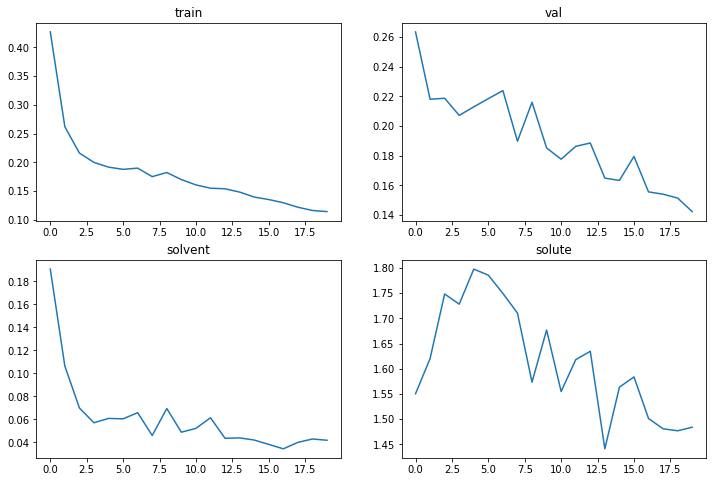

In [7]:
plot_losses(project_path('Run_results/'+runs_folder+'/run_log.tsv'))